In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'shared')))
import setup_code
stroke_data = setup_code.stroke_data

## Importing packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Explore the dataset

In [3]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## A little bit of data preprocessing

In [4]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
### getting the bmi mean for non-null values
bmi_mean = stroke_data[~stroke_data['bmi'].isna()]['bmi'].mean()

In [6]:
### filling the missing bmi values with the mean
na_index = stroke_data[stroke_data['bmi'].isna()].index
stroke_data.loc[na_index, 'bmi'] = bmi_mean

In [7]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Matplotlib and histogram

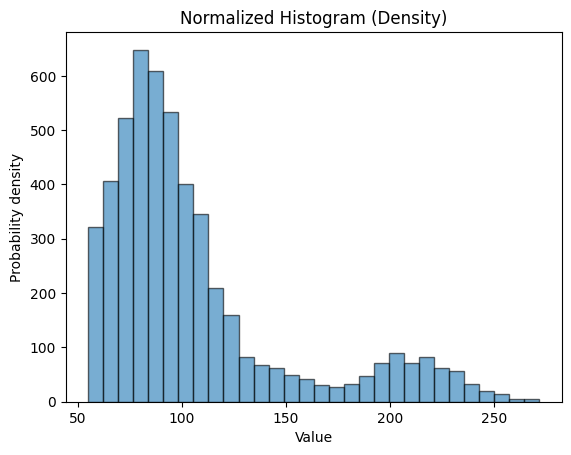

In [8]:
plt.hist(stroke_data.avg_glucose_level, bins=30, alpha=0.6, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Normalized Histogram (Density)')
plt.show()

### Changing font size and plot size

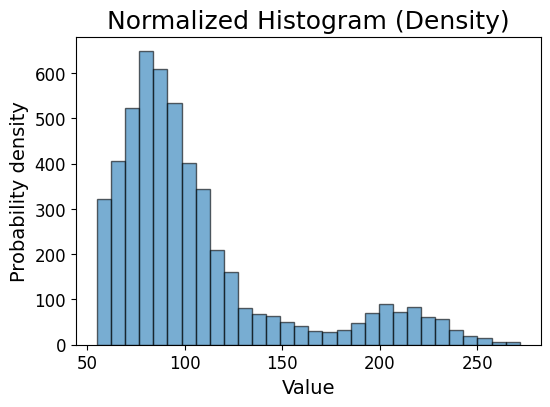

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(stroke_data.avg_glucose_level, bins=30, alpha=0.6, edgecolor='black')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Normalized Histogram (Density)', fontsize=18)
plt.show()

### Saving the plot

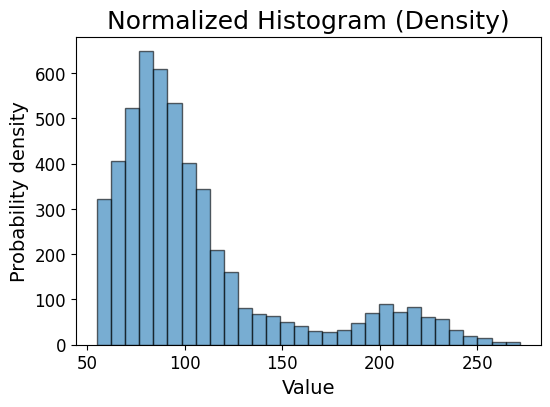

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(stroke_data.avg_glucose_level, bins=30, alpha=0.6, edgecolor='black')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.grid(axis='y', alpha=0.75)
plt.title('Normalized Histogram (Density)', fontsize=18)
plt.savefig('avg_glucose_level_histogram.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Seaborn and scatter plot

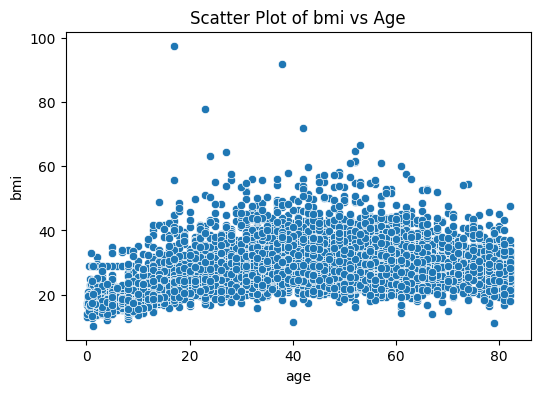

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stroke_data, x='age', y='bmi')
plt.title('Scatter Plot of bmi vs Age')
plt.show()

### Color

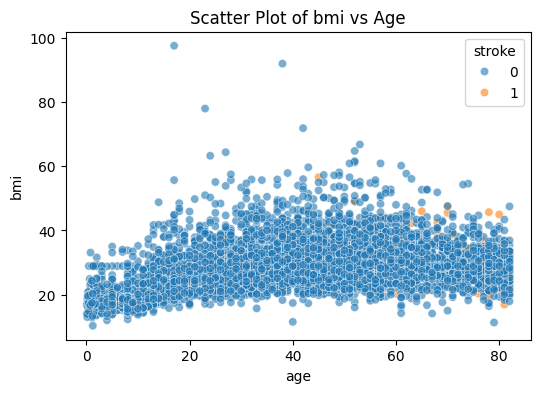

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stroke_data, x='age', y='bmi', hue='stroke', alpha=0.6)
plt.title('Scatter Plot of bmi vs Age')
plt.show()

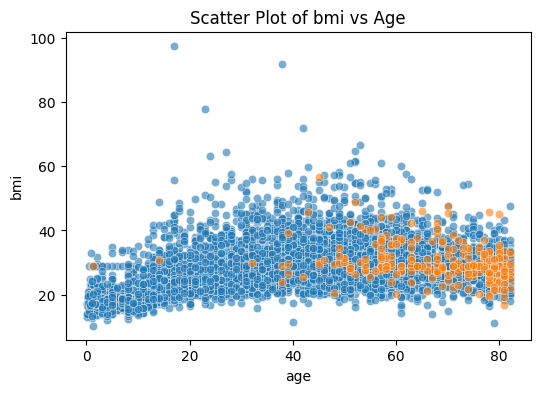

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stroke_data[stroke_data['stroke']==0], x='age', y='bmi', alpha=0.6)
sns.scatterplot(data=stroke_data[stroke_data['stroke']==1], x='age', y='bmi', alpha=0.6)
plt.title('Scatter Plot of bmi vs Age')
plt.show()

### Multiple plots

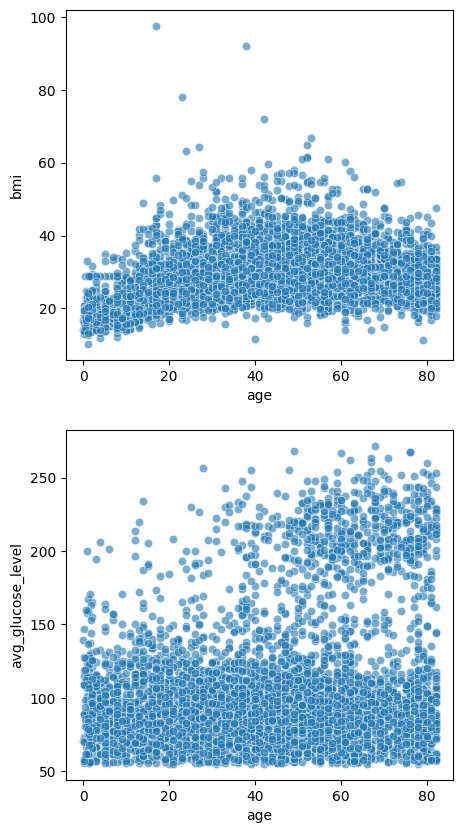

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

sns.scatterplot(data=stroke_data, x='age', y='bmi', alpha=0.6, ax=axes[0])

sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', alpha=0.6, ax=axes[1])

plt.show()

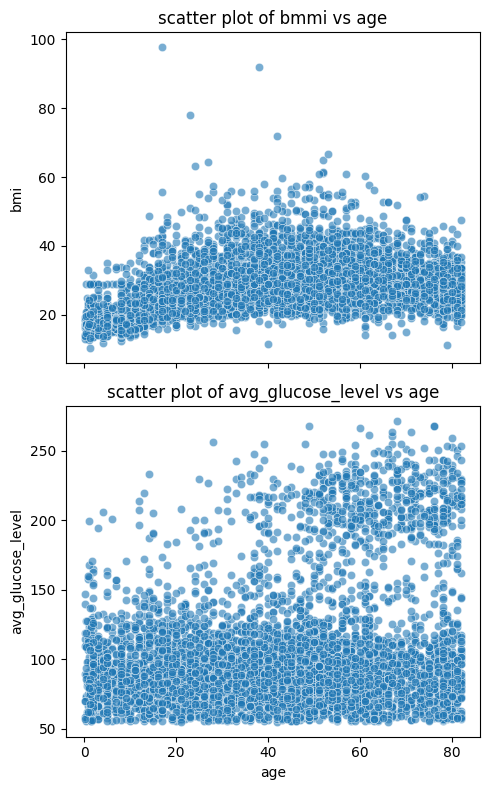

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

sns.scatterplot(data=stroke_data, x='age', y='bmi', alpha=0.6, ax=axes[0])
axes[0].set_title('scatter plot of bmmi vs age')

sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', alpha=0.6, ax=axes[1])
axes[1].set_title('scatter plot of avg_glucose_level vs age')

plt.tight_layout()
plt.show()

## Seaborn and distribution visualization

### box plot

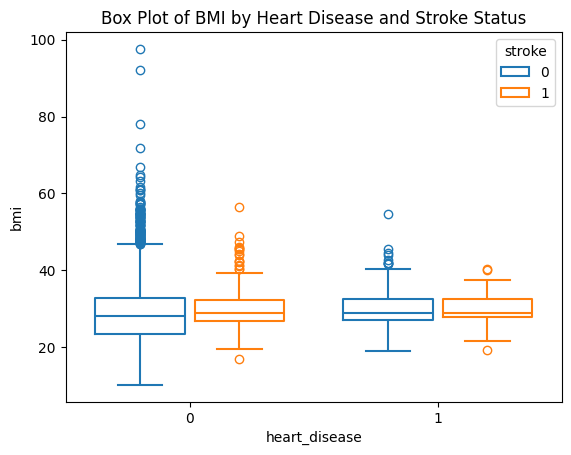

In [16]:
sns.boxplot(data=stroke_data, x="heart_disease", y="bmi", hue="stroke", fill=False, gap=.1)
plt.title('Box Plot of BMI by Heart Disease and Stroke Status')
plt.show()

### violin plot

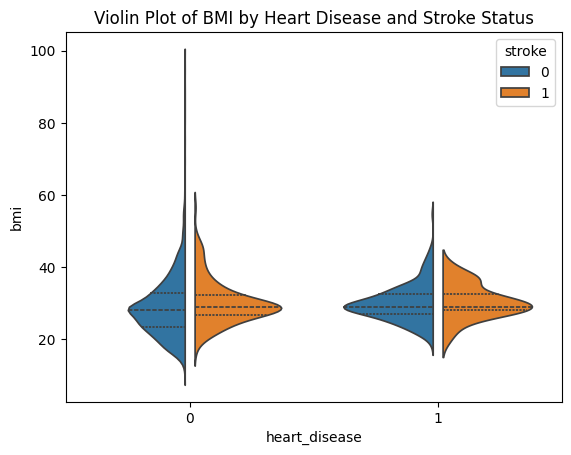

In [17]:
sns.violinplot(data=stroke_data, x="heart_disease", y="bmi", hue="stroke", split=True, gap=.1, inner="quart")
plt.title('Violin Plot of BMI by Heart Disease and Stroke Status')
plt.show()

## Visualizing correlation

In [18]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Pairplot

In [19]:
df_pairplot = stroke_data[['age', 'bmi', 'avg_glucose_level', 'stroke']]

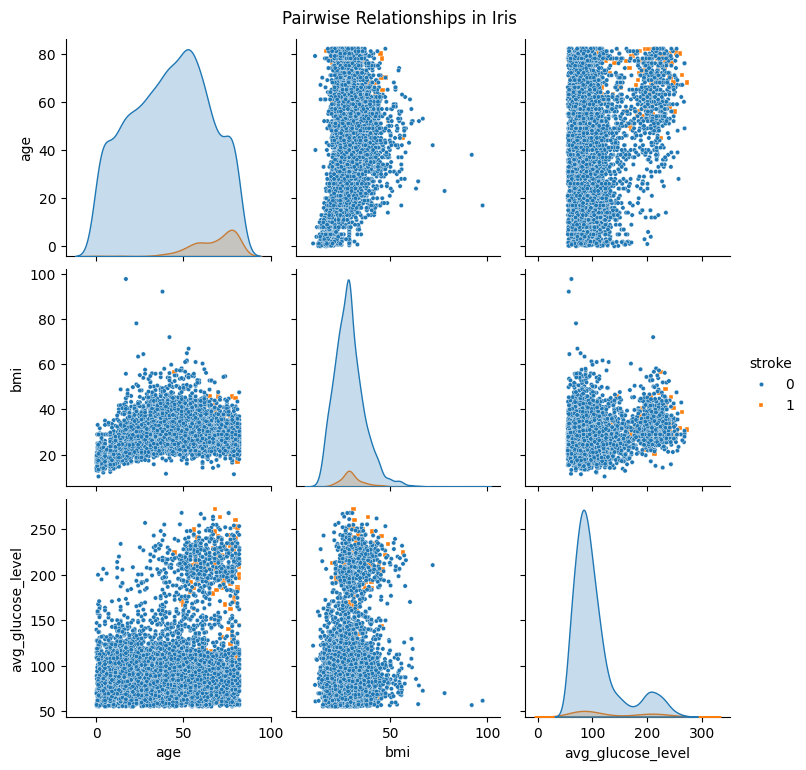

In [20]:
sns.pairplot(
    df_pairplot,
    hue="stroke",      
    diag_kind="kde",      
    markers=["o", "s"],plot_kws={'s': 10}
)
plt.suptitle("Pairwise Relationships in Iris", y =1.02)
plt.show()

In [21]:
df_pairplot_reordered = pd.concat([df_pairplot[df_pairplot['stroke'] == 0],df_pairplot[df_pairplot['stroke'] == 1]]).reset_index(drop=True)


In [22]:
df_pairplot_reordered.head()

,age,bmi,avg_glucose_level,stroke
0,3.0,18.0,95.12,0
1,58.0,39.2,87.96,0
2,8.0,17.6,110.89,0
3,70.0,35.9,69.04,0
4,14.0,19.1,161.28,0


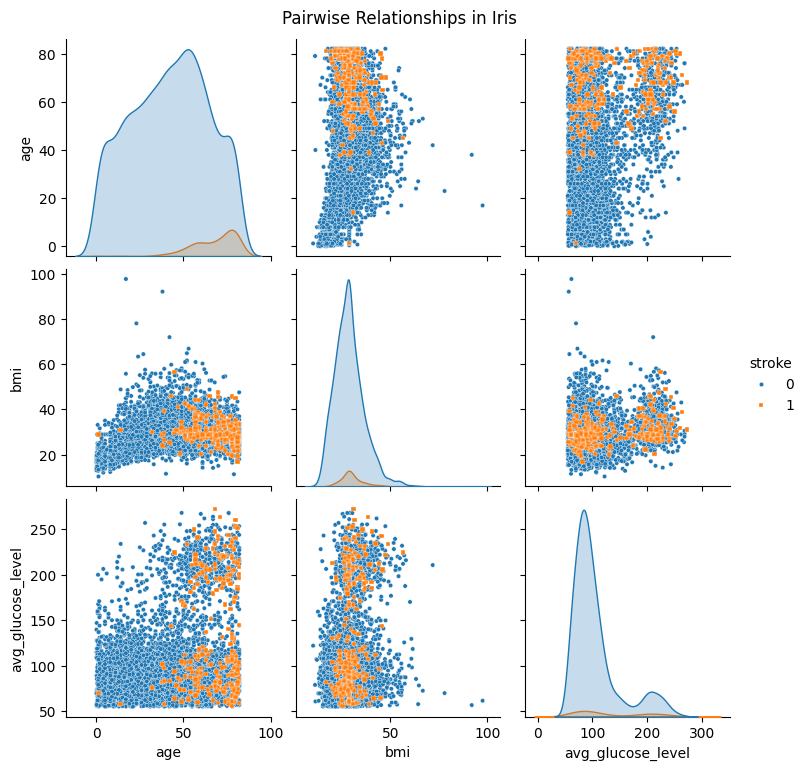

In [23]:
sns.pairplot(
    df_pairplot_reordered,
    hue="stroke",      
    diag_kind="kde",      
    markers=["o", "s"],plot_kws={'s': 10}
)
plt.suptitle("Pairwise Relationships in Iris", y =1.02)
plt.show()

### Heatmap

In [24]:
stroke_numerical = stroke_data.select_dtypes(include=['float64'])

In [25]:
stroke_numerical.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000


In [26]:
correlations_df = stroke_numerical.corr()

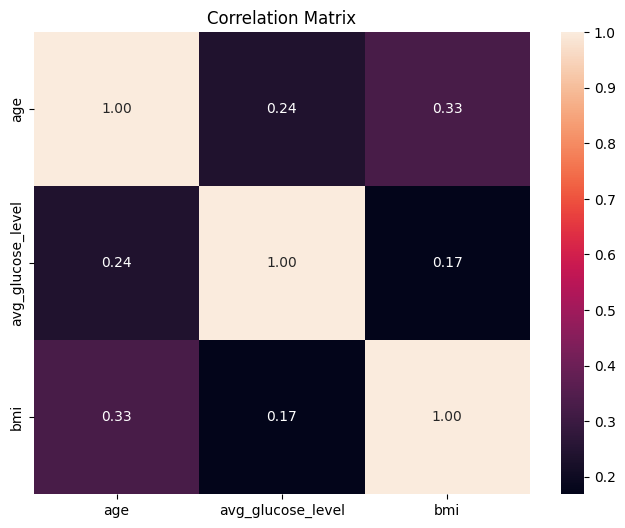

In [27]:

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlations_df,
    annot=True,       
    fmt=".2f",         
)
plt.title("Correlation Matrix")
plt.show()

## Linear regression and line plot

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'sklearn'

In [28]:
X_train, X_test, y_train, y_test =train_test_split(stroke_data['age'].values, stroke_data['bmi'].values, test_size=20, shuffle=False)

In [29]:

model = LinearRegression()

model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))


LinearRegression()

In [30]:
stroke_data['age'].max(), stroke_data['age'].min()

(82.0, 0.08)

In [31]:
X_values = np.linspace(0,80,50)

In [32]:
predicted_bmi = model.predict(X_values.reshape(-1, 1))

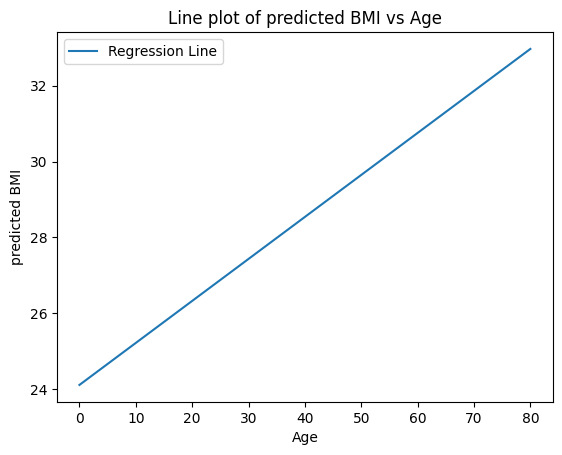

In [33]:
plt.plot(X_values, predicted_bmi, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('predicted BMI')
plt.title('Line plot of predicted BMI vs Age')
plt.legend()
plt.show()

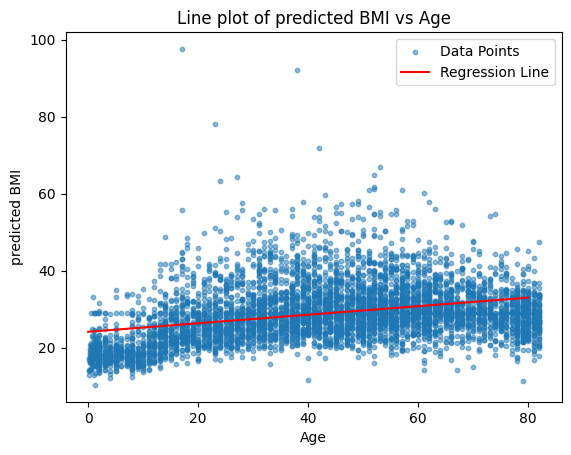

In [34]:
plt.scatter(stroke_data['age'], stroke_data['bmi'], label='Data Points', alpha=0.5, s= 10)
plt.plot(X_values, predicted_bmi, label='Regression Line', color='red')
plt.xlabel('Age')
plt.ylabel('predicted BMI')
plt.title('Line plot of predicted BMI vs Age')
plt.legend()
plt.show()

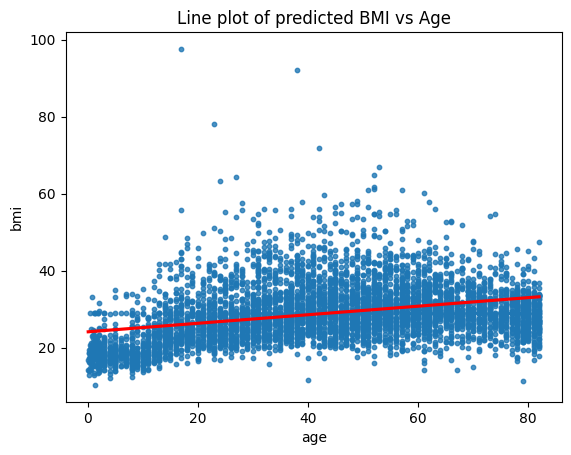

In [35]:

sns.regplot(data=stroke_data, x="age", y="bmi",scatter_kws={'s': 10},  line_kws={'color': 'red'})
plt.title('Line plot of predicted BMI vs Age')
plt.show()